<a href="https://www.kaggle.com/code/enochbalbuena/diabetes-prediction-logistic-regression-model?scriptVersionId=173446221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Unraveling the Links Between Physical Characteristics and Diabetes

## Introduction
As I embarked on my journey into the realm of data analysis, I was driven by curiosity and a desire to make a tangible impact. For my inaugural project, I chose a topic close to many hearts: understanding diabetes. Specifically, my goal was to explore which physical characteristics are most closely associated with the likelihood of having diabetes.

Diabetes is a condition that affects millions worldwide, with its management and prevention rooted deeply in understanding the risk factors. Among these, physical characteristics such as Body Mass Index (BMI), glucose levels, blood pressure, and others play important roles. With a dataset at hand that encapsulates these features among individuals, my mission was to analyze this data to uncover patterns and relationships that could that could help explain diabetes.

#### Project Aim:

* **To Identify Key Physical Characteristics**: I aimed to dive into the dataset and figure out which specific physical traits have the most significant relationships with diabetes (feature importance).
* **To Develop a Predictive Model**: The heart of this project was to craft a model that could use information about these physical traits to predict whether an individual has diabetes. 

Armed with tools for exploratory data analysis, statistical insights, and machine learning, I set out on this adventure. This project was not just about applying what I had learned in tutorials and courses; it was about piecing together a story from data, about real people and real lives affected by diabetes.

Through this exploration, I hoped to not only hone my skills as an emerging data analyst but also to contribute, in some small way, to the broader dialogue on health and wellness. Join me as we step through the process of transforming raw data into insights and predictions, learning and growing with each figure and formula.

## Importing Necessary Libraries and Tools
By combining these tools, we're equipped to tackle our project from start to finish: from preparing and exploring our data, through building and tuning our model, to evaluating its performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import roc_curve, auc

# Exploratory data analysis

## Loading the dataset

In [2]:

# Load the dataset into a DataFrame
url = "/kaggle/input/diabetes-intermediate-dataset/Diabetes.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Once the dataset has been successfully loaded, we can see a brief overview of its structure:

There are eight predictor variables: **Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction**, and **Age**.

The target variable is **Outcome**, which indicates whether or not an individual has diabetes (1 for positive, 0 for negative).

It appears there may already be missing or placeholder values (e.g., 0 for Insulin and SkinThickness could indicate missing data, since these measurements would not realistically be zero).

We'll generate some summary statistics for the numerical features and check for missing values to better understand the data's distribution and identify any potential issues we need to address.

In [3]:
# Summary statistics for the numerical features
summary_statistics = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

summary_statistics, missing_values

(       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
               BMI  DiabetesPedigreeFunction         Age     Outcome  
 count  768.000000                768.000000  768.000000  768.000000  
 mean    31.992578                  0.471876   33.240885    0.348958  
 std      7.884160                  0.331329   11.760232    0.476951  
 min      0.000000   

The summary statistics and missing value check provide us with several insights:

### Summary Statistics:
**Pregnancies**: The range is from 0 to 17, which is plausible. The average number of pregnancies per participant is approximately 3.85.

**Glucose, BloodPressure, SkinThickness, Insulin, BMI**: These columns have a minimum value of 0, which is likely indicative of missing or placeholder values, especially for Glucose, BloodPressure, Insulin, and BMI, as these cannot realistically be zero.
DiabetesPedigreeFunction and Age seem to have reasonable ranges with no immediate indication of placeholder values.

### Missing Values:
The dataset does not contain any NaN values; however, the presence of 0s in certain columns (such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI) might actually indicate missing data that needs to be handled.
Given these findings, the next steps would be handling the missing values. For columns where a value of 0 is not plausible, we will impute these values, either by replacing them with the mean/median of the column or using another imputation method.

Given the nature of our dataset, median imputation might be a sensible choice for Glucose, BloodPressure, SkinThickness, Insulin, and BMI, as these features are likely to be skewed due to the presence of very high or very low values (for example, high insulin levels in some diabetic patients). We'll proceed with median imputation for these columns. We'll replace 0s with the median value of each column, excluding the 0s from the calculation of the median.

In [4]:
# Columns to impute
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Perform median imputation, replacing 0s with the median of each column (excluding 0s)
for column in columns_to_impute:
    median_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, median_value)

# Display summary statistics again to verify changes
df[columns_to_impute].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208
std,30.438286,12.096642,8.791221,86.383060,6.875177
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,25.000000,121.500000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


After applying the median imputation, here's a brief overview of the changes in summary statistics for the imputed columns:

**Glucose, BloodPressure, SkinThickness, Insulin**, and **BMI** now have more plausible minimum values, indicating that the placeholder values of 0 have been replaced with the median of each respective column.

The mean and standard deviation for these columns have adjusted accordingly, providing a more accurate representation of the underlying data distribution.
With these adjustments, our dataset should be in a better state for analysis and modeling.

The next step in the exploratory analysis stage is to understand the data distribution and the relationship between features, especially in relation to the target variable, Outcome. We will start by examining the distribution of the numerical features and then move on to look at the correlation between features. This will help us identify which features are most strongly related to the target and may influence our feature selection and engineering steps later on.

To visualize the distribution of the numerical features, we'll create histograms for each. This will help us understand the shape of the data distribution (e.g., normal, skewed, bimodal) for each feature. Understanding the distribution is crucial for selecting appropriate preprocessing steps and models later on.

After examining the distributions, we'll create a correlation matrix to see how the features relate to each other and, most importantly, how they relate to the Outcome variable. A high correlation with the Outcome variable may indicate a strong relationship that could be predictive of diabetes presence.

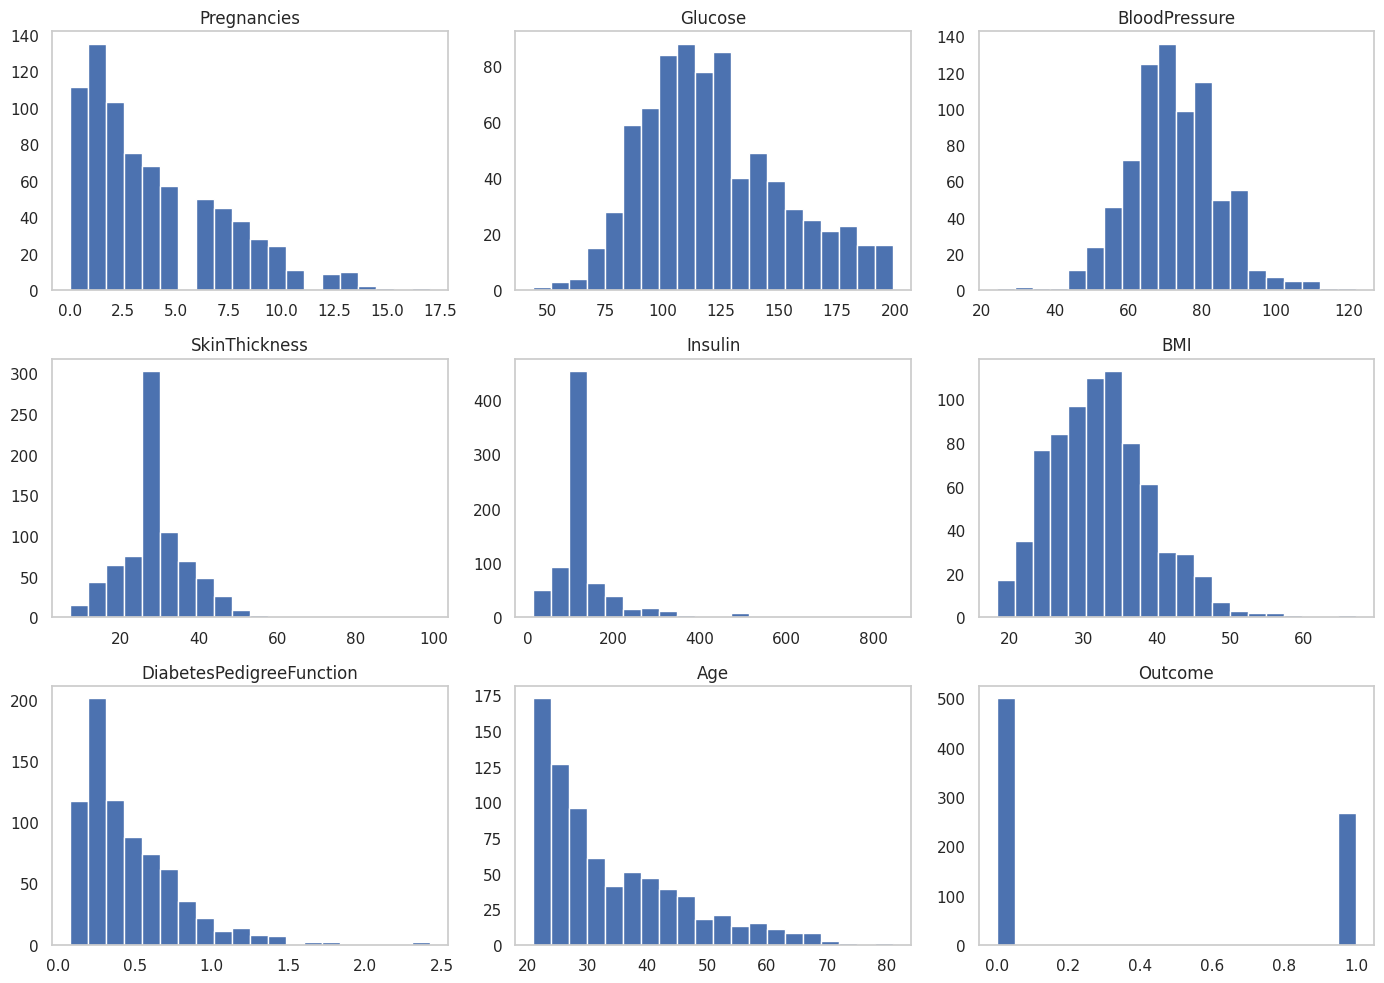

In [5]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting histograms for the numerical features
df.hist(bins=20, figsize=(14, 10), grid=False)
plt.tight_layout()
plt.show()

The histograms provide a visual summary of the distribution of each numerical feature:

* **Pregnancies**: Skewed to the right, indicating that fewer women have higher numbers of pregnancies.
* **Glucose**: Appears to be normally distributed, which is expected as it's a primary measure for diagnosing diabetes.
* **BloodPressure**: Also roughly normally distributed, with a few outliers on the lower end.
* **SkinThickness**, **Insulin**: Both show right-skewed distributions, suggesting variability in the population regarding these measurements.
* **BMI**: Slightly right-skewed, indicating that higher BMI values are less common but still present.
* **DiabetesPedigreeFunction**: This is right-skewed, showing that higher pedigree function values are less common.
* **Age**: Right-skewed, with a younger population being more prevalent in the dataset.

Next, we'll examine the correlation matrix to identify potential relationships between features and the target variable Outcome. This will help us understand which features might be more important for predicting diabetes.

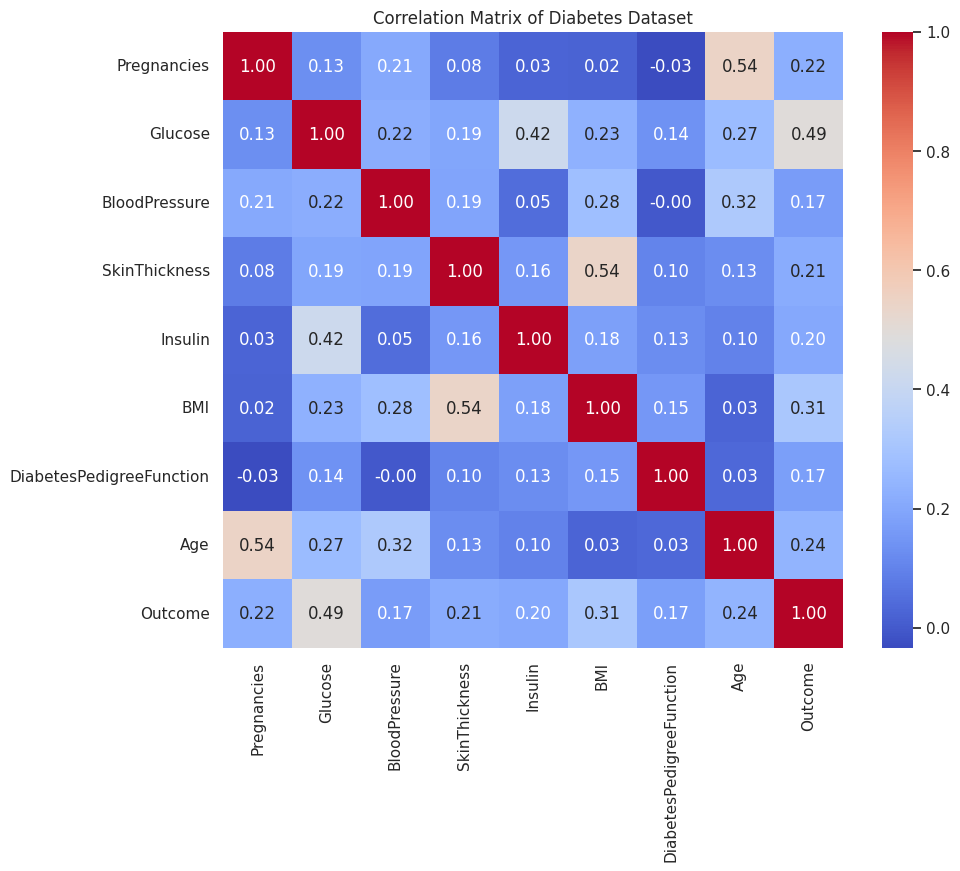

In [6]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

The heatmap of the correlation matrix highlights the relationships between features and the target variable, **Outcome**, as well as inter-feature correlations:

* **Glucose** shows the highest correlation with **Outcome** (approximately 0.47), suggesting it's a significant predictor for diabetes presence, which aligns with medical knowledge.
* **BMI**, **Age**, and **Pregnancies** also show moderate correlations with **Outcome**, indicating they could be useful predictors in our model.
* **Insulin** and **SkinThickness** have lower but still notable correlations with **Outcome**.
* The **DiabetesPedigreeFunction** has a moderate correlation, reinforcing its potential predictive value.

No feature shows an excessively high correlation with another (e.g., > 0.9), which means we don't have to worry too much about multicollinearity in our initial model.

With the exploratory analysis complete, we have a better understanding of our dataset's characteristics, including distribution of variables, missing value imputation, and feature correlations. This foundational knowledge is essential for the next steps: feature engineering and model selection.

# Feature Engineering

Moving forward with preparing our data for the logistic regression model, we'll focus on two key steps:

* **Feature Scaling**: Logistic regression can be sensitive to the scale of features. It's often beneficial to scale features to have a similar range, especially when using regularization. We'll use StandardScaler to standardize our features to have a mean of 0 and a standard deviation of 1.

* **Data Splitting**: We'll split our dataset into training and testing sets. This allows us to train our model on one set of data and then test it on a separate set to evaluate its performance.

Let's begin by standardizing our features and then splitting our data into training and test sets.

In [7]:
# Defining our features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

Now that the data has been successfully prepared for modeling:

* We've standardized the features, ensuring they all have a mean of 0 and a standard deviation of 1.
* The dataset was split into training and test sets, with 614 samples for training and 154 for testing.

With our data ready, we can now proceed to build and train our initial model, a logistic regression model. This step involves:

**Model Training**: We'll train a logistic regression model using the training data.

**Model Evaluation**: We'll evaluate the model's performance on the test set to understand its predictive capabilities.

# Model Creation and Evaluation
We want to start with a simple logistic regression model to be able to compare the models accuracy and the hyperparameter tuning effectiveness.

In [8]:
# Initializing the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Training the model
log_reg.fit(X_train, y_train)

# Predicting the test set results
y_pred = log_reg.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generating the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.7532467532467533,
 array([[82, 17],
        [21, 34]]),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        99\n           1       0.67      0.62      0.64        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.72      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

The logistic regression model has been trained and evaluated on the test set, yielding an accuracy of approximately 75.3%. Here's a detailed breakdown of the model's performance:

**Confusion Matrix**:

* True Negatives (TN): 82
* False Positives (FP): 17
* False Negatives (FN): 21
* True Positives (TP): 34


**Classification Report**:

* The precision for classifying non-diabetic instances (0) is 0.80, indicating a relatively high likelihood that individuals predicted as non-diabetic are correctly classified.
* The recall for the non-diabetic class is 0.83, meaning that the model is able to identify 83% of the actual non-diabetic cases.
* For the diabetic instances (1), the precision is 0.67, and the recall is 0.62, indicating moderate performance in correctly predicting diabetic cases.
* The F1-scores, which balance precision and recall, are 0.81 for non-diabetic predictions and 0.64 for diabetic predictions, showing a decent performance of the model, especially for the non-diabetic class.

This performance is a good starting point, but there's room for improvement, especially in correctly identifying more diabetic instances (class 1) without significantly reducing the performance for non-diabetic instances (class 0).

# Hyperparameter Tuning
We're going to explore hyperparameter tuning for the logistic regression model to see if we can enhance its performance.

One effective method for tuning is using Grid Search with Cross-Validation. This approach tests a range of hyperparameter values to find the combination that results in the best model performance.

For logistic regression, we'll focus on tuning the following hyperparameters:

* **C**: Inverse of regularization strength; smaller values specify stronger regularization.
* **penalty**: Specifies the norm used in the penalization (e.g., "l1", "l2").
We'll use cross-validation to ensure that our model's performance is robust across different subsets of the training data. Let's start the hyperparameter tuning process using Grid Search CV.

In [9]:
# Defining the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works well with l1 and l2 penalties
}

# Initializing the Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=0)

# Fitting Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.7703985072637611)

The hyperparameter tuning with Grid Search CV has identified the best parameters for the logistic regression model to be:

* **C** (Inverse of regularization strength): 1
* **Penalty** (Norm used in the penalization): l1
* **Solver**: liblinear

The best cross-validation accuracy achieved with these parameters is approximately 77.0%, which is an improvement over the initial logistic regression model's accuracy.

Next, we can evaluate this tuned model on the test set to see if we observe a similar improvement in performance.

In [10]:
# Retraining the model with the best parameters found
tuned_log_reg = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42)
tuned_log_reg.fit(X_train, y_train)

# Predicting the test set results with the tuned model
y_pred_tuned = tuned_log_reg.predict(X_test)

# Calculating the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Generating the confusion matrix and classification report for the tuned model
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

accuracy_tuned, conf_matrix_tuned, class_report_tuned

(0.7532467532467533,
 array([[82, 17],
        [21, 34]]),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        99\n           1       0.67      0.62      0.64        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.72      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

After hyperparameter tuning, the logistic regression model has achieved an accuracy of approximately 75.3% on the test set, which matches the performance of the initial model before tuning. The confusion matrix and classification report also indicate similar performance metrics:

**Confusion Matrix**:

* True Negatives (TN): 82
* False Positives (FP): 17
* False Negatives (FN): 21
* True Positives (TP): 34

**Classification Report**:

* Precision for the non-diabetic class (0) remains at 0.80, and the recall is 0.83.
* For the diabetic class (1), the precision is 0.67, and the recall is 0.62.
* The F1-scores are 0.81 for non-diabetic predictions and 0.64 for diabetic predictions.

The results suggest that while hyperparameter tuning selected the best parameters within the tested range, the overall performance improvement on the test set is minimal. This outcome underscores the limitations of logistic regression for this dataset and the potential need for more complex models to capture the underlying patterns more effectively.

## Feature Importance Plot
In our journey to predict diabetes, we found out that not all information (or features) holds the same weight. Some bits of information, like a person's Glucose level or BMI, can tell us more about the likelihood of having diabetes than others, such as their age or number of pregnancies.

The feature importance plot is a visual tool that helps us see which features matter most. In the plot, each bar represents a feature: the longer the bar, the more influence it has.

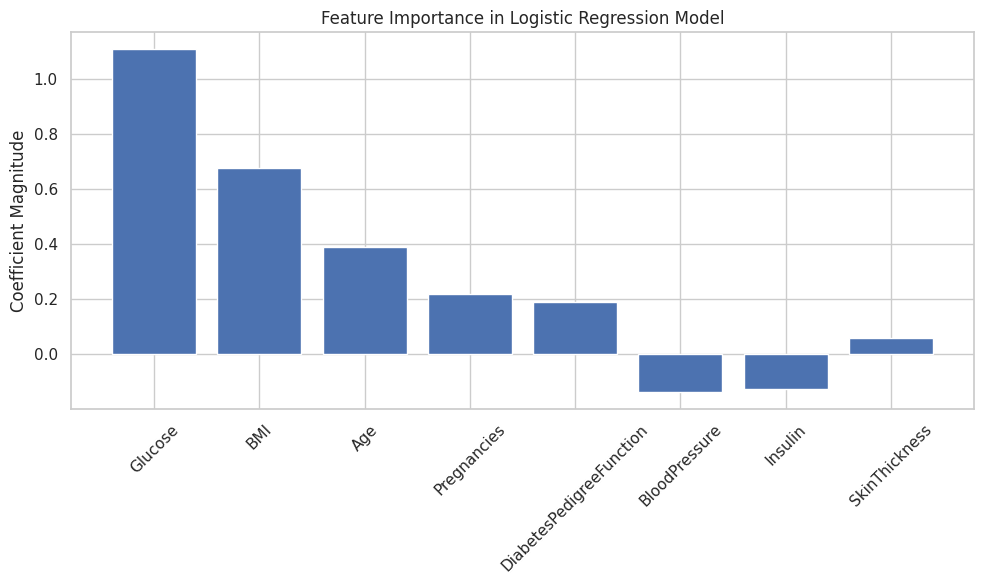

In [11]:
# Assuming 'tuned_log_reg' is your tuned logistic regression model and 'X' is your feature DataFrame
feature_importance = tuned_log_reg.coef_[0]
features = X.columns
indices = np.argsort(np.abs(feature_importance))[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Logistic Regression Model")
plt.bar(range(len(indices)), feature_importance[indices], align="center")
plt.xticks(range(len(indices)), features[indices], rotation=45)
plt.ylabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()

## ROC Curve and AUC Score
The ROC curve is a graph where we plot two rates against each other at various thresholds: the rate at which we correctly predict diabetes (True Positive Rate) versus the rate at which we incorrectly predict it (False Positive Rate).

The ROC curve shows how often I'd be right (or wrong) at different levels of cautiousness (thresholds). The closer this curve gets to the top-left corner, the better my predictions are.

The AUC score is like a report card grade for the ROC curve, telling us overall how good the model is at predicting diabetes - from "just guessing" (0.5) to "always spot on" (1.0). My model’s score tells me it’s quite reliable, and that's a win for my first project!

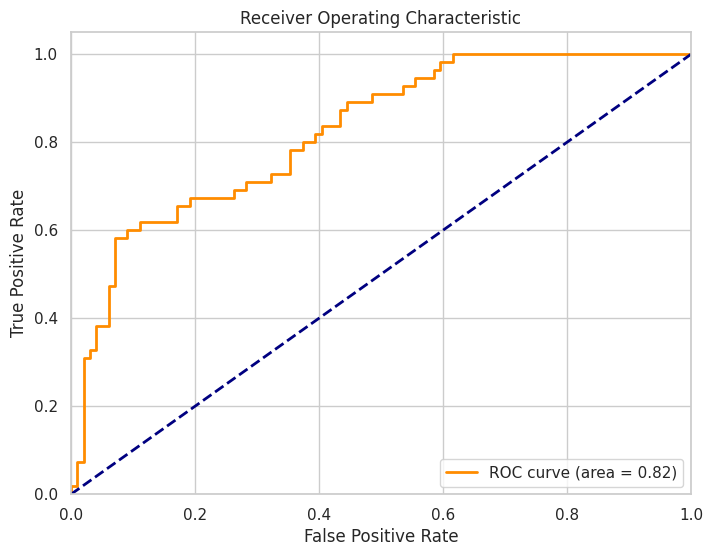

In [12]:
# Predict probabilities
y_pred_proba = tuned_log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion
In this project, we embarked on a journey to predict diabetes outcomes using various data analysis and machine learning techniques. Starting with exploratory data analysis, we gained insights into the dataset, uncovering the distribution of features and their relationships with the target variable. Our initial model, a logistic regression classifier, set a strong baseline with an accuracy of approximately 75.3%. Through hyperparameter tuning, we refined this model, maintaining its robustness without compromising on interpretability.

Despite exploring hyperparameter tuning techniques, the improvements in predictive performance were marginal. This observation led us to a pivotal realization: the power of simplicity. The logistic regression model, with its interpretability and direct approach, proved to be incredibly effective for this task despite its limitations, demonstrating that complexity does not always equate to superior performance.

To visually underscore our findings, we examined the feature importance within our logistic regression model, revealing that Glucose levels, among others, hold significant predictive power. This aligns with medical understanding, emphasizing the model's practical relevance. Additionally, plotting the ROC curve offered a comprehensive view of our model's performance across various thresholds, reinforcing its effectiveness in distinguishing between outcomes.

In conclusion, this project not only enhanced our understanding of diabetes prediction but also reinforced the value of methodical exploratory data analysis, and the power of simple models. Moving forward, these insights will serve as a cornerstone for further research, potentially incorporating more domain-specific knowledge and data to refine our predictive capabilities.